In [1]:
import glob
from scipy.misc import imread
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.feature import hog
from IPython.display import HTML
%matplotlib inline

## Read the Data

In [2]:
GTI_noncar_images = glob.glob('training_data/non-vehicles/GTI/*.png')
extras_noncar_images = glob.glob('training_data/non-vehicles/Extras/*.png')

GTI_car_images_far = glob.glob('training_data/vehicles/GTI_Far/*.png')
GTI_car_images_left = glob.glob('training_data/vehicles/GTI_Left/*.png')
GTI_car_images_close = glob.glob('training_data/vehicles/GTI_MiddleClose/*.png')
GTI_car_images_right = glob.glob('training_data/vehicles/GTI_Right/*.png')
KITTI_car_images = glob.glob('training_data/vehicles/KITTI_extracted/*.png')

GTI_noncar = [image for image in GTI_noncar_images]
extras_noncar = [image for image in extras_noncar_images]
notcar_list = GTI_noncar + extras_noncar

cars_far = [image for image in GTI_car_images_far]
cars_left = [image for image in GTI_car_images_left]
cars_close = [image for image in GTI_car_images_close]
cars_right = [image for image in GTI_car_images_right]
cars_KITTI = [image for image in KITTI_car_images]
car_list = cars_far + cars_left + cars_close + cars_right + cars_KITTI
       
# Define a function to return some characteristics of the dataset 
def data_look(car_list, notcar_list):
    data_dict = {}
    # Define a key in data_dict "n_cars" and store the number of car images
    data_dict["n_cars"] = len(car_list)
    # Define a key "n_notcars" and store the number of notcar images
    data_dict["n_notcars"] = len(notcar_list)
    # Read in a test image, either car or notcar
    example_img = imread(car_list[0])
    # Define a key "image_shape" and store the test image shape 3-tuple
    data_dict["image_shape"] = example_img.shape
    # Define a key "data_type" and store the data type of the test image.
    data_dict["data_type"] = example_img.dtype
    # Return data_dict
    return data_dict
    
data_info = data_look(car_list, notcar_list)
print(data_info)

{'n_notcars': 9666, 'image_shape': (64, 64, 3), 'n_cars': 8792, 'data_type': dtype('uint8')}


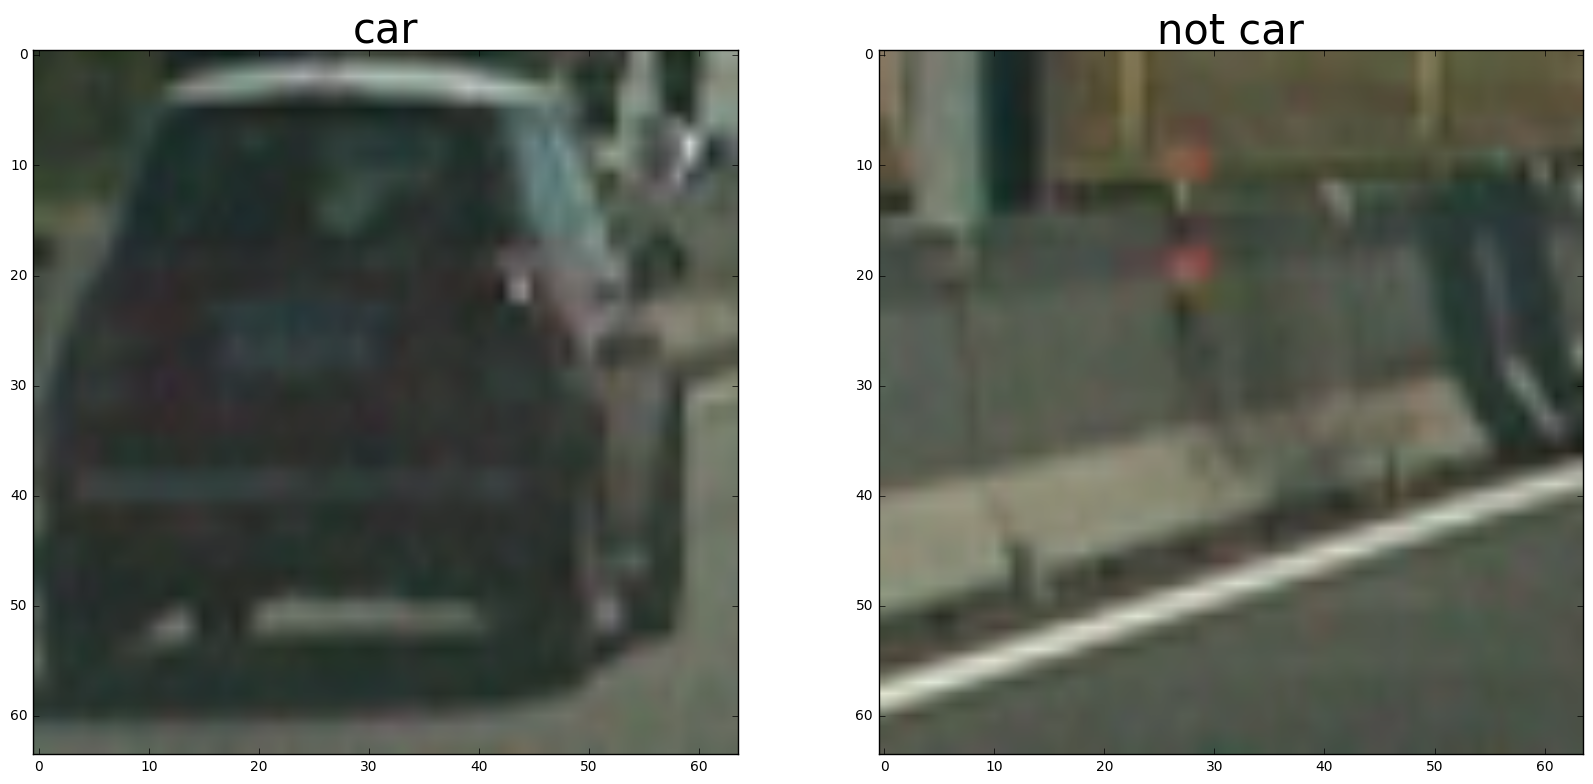

In [3]:
car_img = imread(car_list[888])
notcar_img = imread(notcar_list[440])

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(car_img)
ax1.set_title('car', fontsize=30)
ax2.imshow(notcar_img)
ax2.set_title('not car', fontsize=30)

## Helper Functions

In [4]:
# Helper function to obtain the HOG features of the image
def get_hog_features(img, orient, pix_per_cell, cell_per_block, 
                        vis=False, feature_vec=True):
    # Call with two outputs if vis==True
    if vis == True:
        features, hog_image = hog(img, orientations=orient, 
                                  pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block), 
                                  transform_sqrt=True, 
                                  visualise=vis, feature_vector=feature_vec)
        return features, hog_image
    # Otherwise call with one output
    else:      
        features = hog(img, orientations=orient, 
                       pixels_per_cell=(pix_per_cell, pix_per_cell),
                       cells_per_block=(cell_per_block, cell_per_block), 
                       transform_sqrt=True, 
                       visualise=vis, feature_vector=feature_vec)
        return features

# Helper function to compute binned color features  
def bin_spatial(img, size=(32, 32)):
    # Use cv2.resize().ravel() to create the feature vector
    features = cv2.resize(img, size).ravel() 
    # Return the feature vector
    return features

# Helper function to compute color histogram features 
def color_hist(img, nbins=32, bins_range=(0, 256)):
    # Compute the histogram of the color channels separately
    channel1_hist = np.histogram(img[:,:,0], bins=nbins, range=bins_range)
    channel2_hist = np.histogram(img[:,:,1], bins=nbins, range=bins_range)
    channel3_hist = np.histogram(img[:,:,2], bins=nbins, range=bins_range)
    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((channel1_hist[0], channel2_hist[0], channel3_hist[0]))
    # Return the individual histograms, bin_centers and feature vector
    return hist_features

## Explore color spaces

In [6]:
#set the HOG parameters
orient = 9 
pix_per_cell = 8
cell_per_block = 2
vis=True
feature_vec=False

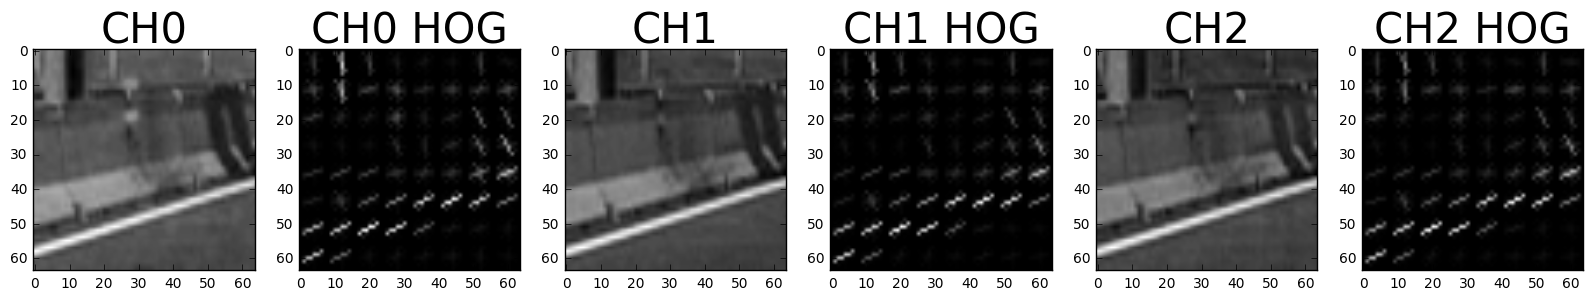

In [62]:
#RGB
#img_RGB = np.copy(car_img)
img_RGB = np.copy(notcar_img)

C0_features, C0_img = get_hog_features(img_RGB[:,:,0], orient, 
                        pix_per_cell, cell_per_block, vis, feature_vec)
C1_features, C1_img = get_hog_features(img_RGB[:,:,1], orient, 
                        pix_per_cell, cell_per_block, vis, feature_vec)
C2_features, C2_img = get_hog_features(img_RGB[:,:,2], orient, 
                        pix_per_cell, cell_per_block, vis, feature_vec)

f, (ax1,ax2,ax3,ax4,ax5,ax6) = plt.subplots(1, 6, figsize=(20,10))

ax1.imshow(img_RGB[:,:,0],cmap='gray')
ax1.set_title('CH0', fontsize=30)
ax2.imshow(C0_img,cmap='gray')
ax2.set_title('CH0 HOG', fontsize=30)

ax3.imshow(img_RGB[:,:,1],cmap='gray')
ax3.set_title('CH1', fontsize=30)
ax4.imshow(C1_img,cmap='gray')
ax4.set_title('CH1 HOG', fontsize=30)

ax5.imshow(img_RGB[:,:,2],cmap='gray')
ax5.set_title('CH2', fontsize=30)
ax6.imshow(C2_img,cmap='gray')
ax6.set_title('CH2 HOG', fontsize=30)

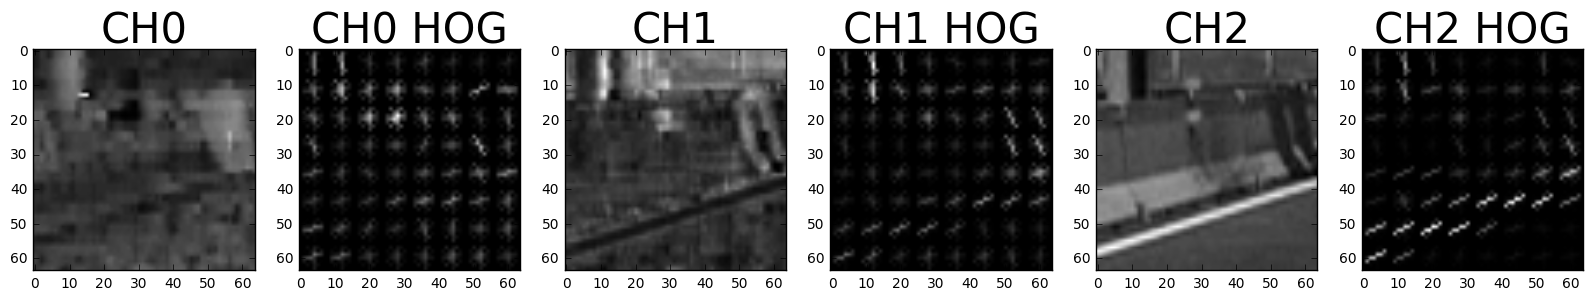

In [7]:
# HSV
#img_HSV = cv2.cvtColor(car_img, cv2.COLOR_RGB2HSV)
img_HSV = cv2.cvtColor(notcar_img, cv2.COLOR_RGB2HSV)

C0_features, C0_img = get_hog_features(img_HSV[:,:,0], orient, 
                        pix_per_cell, cell_per_block, vis, feature_vec)
C1_features, C1_img = get_hog_features(img_HSV[:,:,1], orient, 
                        pix_per_cell, cell_per_block, vis, feature_vec)
C2_features, C2_img = get_hog_features(img_HSV[:,:,2], orient, 
                        pix_per_cell, cell_per_block, vis, feature_vec)

f, (ax1,ax2,ax3,ax4,ax5,ax6) = plt.subplots(1, 6, figsize=(20,10))

ax1.imshow(img_HSV[:,:,0],cmap='gray')
ax1.set_title('CH0', fontsize=30)
ax2.imshow(C0_img,cmap='gray')
ax2.set_title('CH0 HOG', fontsize=30)

ax3.imshow(img_HSV[:,:,1],cmap='gray')
ax3.set_title('CH1', fontsize=30)
ax4.imshow(C1_img,cmap='gray')
ax4.set_title('CH1 HOG', fontsize=30)

ax5.imshow(img_HSV[:,:,2],cmap='gray')
ax5.set_title('CH2', fontsize=30)
ax6.imshow(C2_img,cmap='gray')
ax6.set_title('CH2 HOG', fontsize=30)

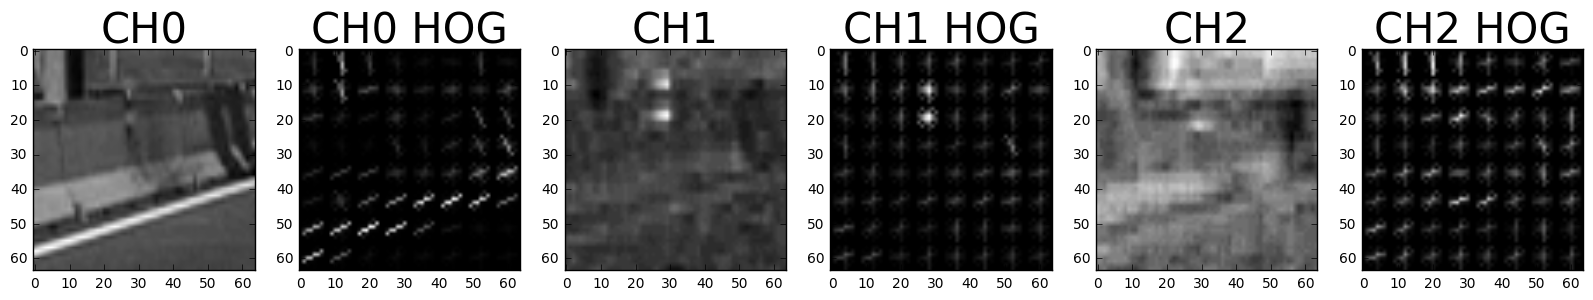

In [64]:
# LUV
#img_LUV = cv2.cvtColor(car_img, cv2.COLOR_RGB2LUV)
img_LUV = cv2.cvtColor(notcar_img, cv2.COLOR_RGB2LUV)

C0_features, C0_img = get_hog_features(img_LUV[:,:,0], orient, 
                        pix_per_cell, cell_per_block, vis, feature_vec)
C1_features, C1_img = get_hog_features(img_LUV[:,:,1], orient, 
                        pix_per_cell, cell_per_block, vis, feature_vec)
C2_features, C2_img = get_hog_features(img_LUV[:,:,2], orient, 
                        pix_per_cell, cell_per_block, vis, feature_vec)

f, (ax1,ax2,ax3,ax4,ax5,ax6) = plt.subplots(1, 6, figsize=(20,10))

ax1.imshow(img_LUV[:,:,0],cmap='gray')
ax1.set_title('CH0', fontsize=30)
ax2.imshow(C0_img,cmap='gray')
ax2.set_title('CH0 HOG', fontsize=30)

ax3.imshow(img_LUV[:,:,1],cmap='gray')
ax3.set_title('CH1', fontsize=30)
ax4.imshow(C1_img,cmap='gray')
ax4.set_title('CH1 HOG', fontsize=30)

ax5.imshow(img_LUV[:,:,2],cmap='gray')
ax5.set_title('CH2', fontsize=30)
ax6.imshow(C2_img,cmap='gray')
ax6.set_title('CH2 HOG', fontsize=30)

In [5]:
# HLS
img_HLS = cv2.cvtColor(car_img, cv2.COLOR_RGB2HLS)
#img_HLS = cv2.cvtColor(notcar_img, cv2.COLOR_RGB2HLS)

C0_features, C0_img = get_hog_features(img_HLS[:,:,0], orient, 
                        pix_per_cell, cell_per_block, vis, feature_vec)
C1_features, C1_img = get_hog_features(img_HLS[:,:,1], orient, 
                        pix_per_cell, cell_per_block, vis, feature_vec)
C2_features, C2_img = get_hog_features(img_HLS[:,:,2], orient, 
                        pix_per_cell, cell_per_block, vis, feature_vec)

f, (ax1,ax2,ax3,ax4,ax5,ax6) = plt.subplots(1, 6, figsize=(20,10))

ax1.imshow(img_HLS[:,:,0],cmap='gray')
ax1.set_title('CH0', fontsize=30)
ax2.imshow(C0_img,cmap='gray')
ax2.set_title('CH0 HOG', fontsize=30)

ax3.imshow(img_HLS[:,:,1],cmap='gray')
ax3.set_title('CH1', fontsize=30)
ax4.imshow(C1_img,cmap='gray')
ax4.set_title('CH1 HOG', fontsize=30)

ax5.imshow(img_HLS[:,:,2],cmap='gray')
ax5.set_title('CH2', fontsize=30)
ax6.imshow(C2_img,cmap='gray')
ax6.set_title('CH2 HOG', fontsize=30)

NameError: name 'orient' is not defined

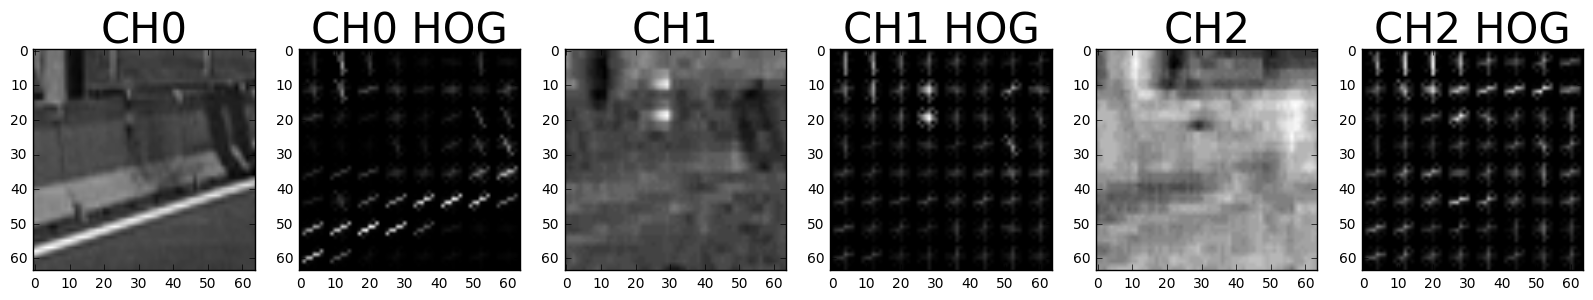

In [66]:
# YUV
#img_YUV = cv2.cvtColor(car_img, cv2.COLOR_RGB2YUV)
img_YUV = cv2.cvtColor(notcar_img, cv2.COLOR_RGB2YUV)

C0_features, C0_img = get_hog_features(img_YUV[:,:,0], orient, 
                        pix_per_cell, cell_per_block, vis, feature_vec)
C1_features, C1_img = get_hog_features(img_YUV[:,:,1], orient, 
                        pix_per_cell, cell_per_block, vis, feature_vec)
C2_features, C2_img = get_hog_features(img_YUV[:,:,2], orient, 
                        pix_per_cell, cell_per_block, vis, feature_vec)

f, (ax1,ax2,ax3,ax4,ax5,ax6) = plt.subplots(1, 6, figsize=(20,10))

ax1.imshow(img_YUV[:,:,0],cmap='gray')
ax1.set_title('CH0', fontsize=30)
ax2.imshow(C0_img,cmap='gray')
ax2.set_title('CH0 HOG', fontsize=30)

ax3.imshow(img_YUV[:,:,1],cmap='gray')
ax3.set_title('CH1', fontsize=30)
ax4.imshow(C1_img,cmap='gray')
ax4.set_title('CH1 HOG', fontsize=30)

ax5.imshow(img_YUV[:,:,2],cmap='gray')
ax5.set_title('CH2', fontsize=30)
ax6.imshow(C2_img,cmap='gray')
ax6.set_title('CH2 HOG', fontsize=30)

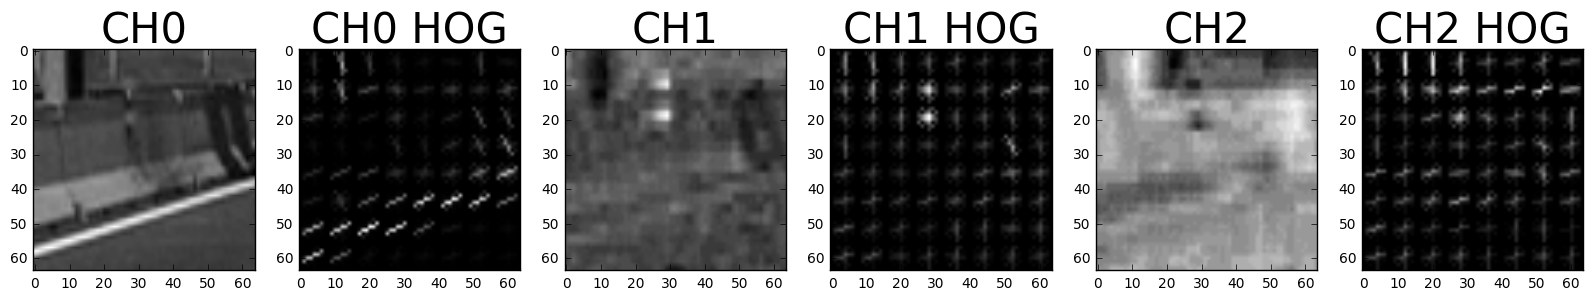

In [67]:
# YCrCB

#img_YCrCB = cv2.cvtColor(car_img, cv2.COLOR_RGB2YCrCb)
img_YCrCB = cv2.cvtColor(notcar_img, cv2.COLOR_RGB2YCrCb)

C0_features, C0_img = get_hog_features(img_YCrCB[:,:,0], orient, 
                        pix_per_cell, cell_per_block, vis, feature_vec)
C1_features, C1_img = get_hog_features(img_YCrCB[:,:,1], orient, 
                        pix_per_cell, cell_per_block, vis, feature_vec)
C2_features, C2_img = get_hog_features(img_YCrCB[:,:,2], orient, 
                        pix_per_cell, cell_per_block, vis, feature_vec)

f, (ax1,ax2,ax3,ax4,ax5,ax6) = plt.subplots(1, 6, figsize=(20,10))

ax1.imshow(img_YCrCB[:,:,0],cmap='gray')
ax1.set_title('CH0', fontsize=30)
ax2.imshow(C0_img,cmap='gray')
ax2.set_title('CH0 HOG', fontsize=30)

ax3.imshow(img_YCrCB[:,:,1],cmap='gray')
ax3.set_title('CH1', fontsize=30)
ax4.imshow(C1_img,cmap='gray')
ax4.set_title('CH1 HOG', fontsize=30)

ax5.imshow(img_YCrCB[:,:,2],cmap='gray')
ax5.set_title('CH2', fontsize=30)
ax6.imshow(C2_img,cmap='gray')
ax6.set_title('CH2 HOG', fontsize=30)

## Final Comparison

In [74]:
#set the HOG parameters
orient = 9
pix_per_cell = 2
cell_per_block = 2
vis=True
feature_vec=False

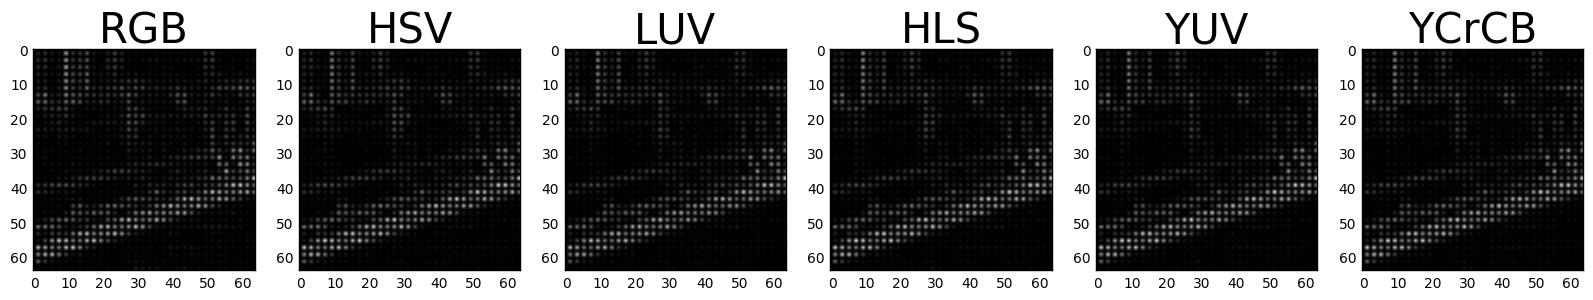

In [75]:
RGB_C0_features, RGB_C0_img = get_hog_features(img_RGB[:,:,0], orient, 
                        pix_per_cell, cell_per_block, vis, feature_vec)

HSV_C2_features, HSV_C2_img = get_hog_features(img_HSV[:,:,2], orient, 
                        pix_per_cell, cell_per_block, vis, feature_vec)

LUV_C0_features, LUV_C0_img = get_hog_features(img_LUV[:,:,0], orient, 
                        pix_per_cell, cell_per_block, vis, feature_vec)

HLS_C1_features, HLS_C1_img = get_hog_features(img_HLS[:,:,1], orient, 
                        pix_per_cell, cell_per_block, vis, feature_vec)

YUV_C0_features, YUV_C0_img = get_hog_features(img_YUV[:,:,0], orient, 
                        pix_per_cell, cell_per_block, vis, feature_vec)

YCrCB_C0_features, YCrCB_C0_img = get_hog_features(img_YCrCB[:,:,0], orient, 
                        pix_per_cell, cell_per_block, vis, feature_vec)

f, (ax1,ax2,ax3,ax4,ax5,ax6) = plt.subplots(1, 6, figsize=(20,10))

ax1.imshow(RGB_C0_img,cmap='gray')
ax1.set_title('RGB', fontsize=30)
ax2.imshow(HSV_C2_img,cmap='gray')
ax2.set_title('HSV', fontsize=30)
ax3.imshow(LUV_C0_img,cmap='gray')
ax3.set_title('LUV', fontsize=30)
ax4.imshow(HLS_C1_img,cmap='gray')
ax4.set_title('HLS', fontsize=30)
ax5.imshow(YUV_C0_img,cmap='gray')
ax5.set_title('YUV', fontsize=30)
ax6.imshow(YCrCB_C0_img,cmap='gray')
ax6.set_title('YCrCB', fontsize=30)